# Linear Regression - Mini-Project 1


***Edit this cell with your name(s), tutorial number(s) and ID(s)***

---

Name:Mahmoud Osama

ID:52-0983

Tutorial:T6

---

Name:

ID:

Tutorial:

---


## Dataset Description

The dataset contains historical car auction sales prices, scraped from the outside internet sources and collected in 2015.

Each row represents a sale at a used car auction. Each column is described below.

| Column       | Description                                                                                          |
| ------------ | ---------------------------------------------------------------------------------------------------- |
| year         | Car's year of production                                                                             |
| make         | Car make/brand                                                                                       |
| model        | Car model                                                                                            |
| trim         | Car's trim or grade, which specifies a car model's level of performance, features, options or extras |
| body         | Car body type (e.g. Sedan, SUV, Coupe, etc.)                                                         |
| transmission | Car transmission type. The mechanism that moves the power from the engine to the wheels.             |
| vin          | Vehicle Identification Number, a unique code to identify individual motor vehicles.                  |
| state        | The state in which the car was auctioned.                                                            |
| condition    | The condition of the cars being at the time of auction, 5 being the best score and 1 being the worst.|
| odometer     | The distance traveled by a vehicle since being manufactured, in miles                                |
| color        | Exterior color of the car                                                                            |
| interior     | Interior color of the car                                                                            |
| seller       | The seller of the car or car dealer                                                                  |
| sellingprice | The price a car was sold at in auction.                                                              |
| saledate     | The date on which the car has been sold.                                                             |



## Importing Libraries \& Dataset


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

try:
    df = pd.read_csv('car_prices.csv')
except:
    df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2024/refs/heads/main/data/car_prices.csv')

df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,sellingprice,saledate
0,2013,Hyundai,Sonata,GLS,sedan,automatic,5npeb4acxdh702805,ma,3.9,50404.0mi,black,gray,the hertz corporation,$10900,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Toyota,4Runner,SR5,SUV,automatic,jtezu5jr2e5064567,fl,4.9,17846.0mi,gray,—,award auto sales and leasing inc,$29900,Wed Feb 18 2015 07:15:00 GMT-0800 (PST)
2,2012,Lexus,IS 250,Base,Sedan,automatic,jthbf5c24c5168599,fl,4.1,21122.0mi,silver,black,lexus financial services,$24200,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
3,2002,BMW,X5,4.4i,SUV,automatic,5uxfb33562lh33864,fl,1.9,145303.0mi,black,black,peddle llc,$3200,Wed Mar 04 2015 07:10:00 GMT-0800 (PST)
4,2014,Ford,E-Series Van,E-250,E-Series Van,automatic,1ftne2ew0eda31832,wa,4.9,6714.0mi,white,gray,u-haul,$22100,Wed Feb 18 2015 06:45:00 GMT-0800 (PST)


## Data Inspection

Perform data inspection tasks here (recommended for data understanding).

In [3]:
df.describe()


,year,condition
count,46578.000000,46578.000000
mean,2010.203401,3.424265
std,3.831316,0.944009
min,1990.000000,1.000000
25%,2008.000000,2.700000
50%,2012.000000,3.600000
75%,2013.000000,4.200000
max,2015.000000,5.000000


## Data Pre-Processing & Cleaning

_Apply any data preprocessing and/or feature engineering below. Show/output the changes to the dataset._

In [4]:
import pandas as pd

# Load the dataset
try:
    df = pd.read_csv('car_prices.csv')
except:
    df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2024/refs/heads/main/data/car_prices.csv')

# Check the first few rows and data types to understand the current state of the DataFrame
print(df.head())
print(df.dtypes)

# Ensure 'SellingPrice' column is in string format before processing
df['sellingprice'] = df['sellingprice'].astype(str)

# Data Pre-Processing: Remove currency symbols and commas and convert to float for 'sellingprice'
df['sellingprice'] = df['sellingprice'].str.replace('[\$,]', '', regex=True).astype(float)

# Data Pre-Processing: Remove 'mi' suffix and convert to float for 'odometer'
df['odometer'] = df['odometer'].str.replace('mi', '').astype(float)

# Replace null values in 'odometer' with the mode (direct assignment to avoid SettingWithCopyWarning)
odometer_mode = df['odometer'].mode()[0]
df['odometer'] = df['odometer'].fillna(odometer_mode)


# Convert the "body" column to lowercase
df['body'] = df['body'].str.lower()

# Create a mapping to standardize the "body" types
body_mapping = {
    'sedan': 'Sedan',
    'suv': 'SUV',
    'koup': 'Coupe',
    'convertible': 'Convertible',
    'hatchback': 'Hatchback',
    'van': 'Minivan',
    'wagon': 'Wagon',
    'cap': 'Pickup Truck',
    'cab': 'Pickup Truck',
    'crew': 'Pickup Truck',
    'pickup truck': 'Pickup Truck',
    'coupe': 'Coupe'
}

# Apply the mapping to the "body" column
df['body'] = df['body'].map(body_mapping)

# Display the first few rows of the cleaned dataset
print(df.head())


   year     make         model   trim          body transmission  \
0  2013  Hyundai        Sonata    GLS         sedan    automatic   
1  2014   Toyota       4Runner    SR5           SUV    automatic   
2  2012    Lexus        IS 250   Base         Sedan    automatic   
3  2002      BMW            X5   4.4i           SUV    automatic   
4  2014     Ford  E-Series Van  E-250  E-Series Van    automatic   

                 vin state  condition    odometer   color interior  \
0  5npeb4acxdh702805    ma        3.9   50404.0mi   black     gray   
1  jtezu5jr2e5064567    fl        4.9   17846.0mi    gray        —   
2  jthbf5c24c5168599    fl        4.1   21122.0mi  silver    black   
3  5uxfb33562lh33864    fl        1.9  145303.0mi   black    black   
4  1ftne2ew0eda31832    wa        4.9    6714.0mi   white     gray   

                             seller sellingprice  \
0             the hertz corporation       $10900   
1  award auto sales and leasing inc       $29900   
2          lex

## Exploratory Data Analysis


**Q0 (example): What is the most popular car exterior color?**


**Visualization**

<Axes: xlabel='color', ylabel='count'>

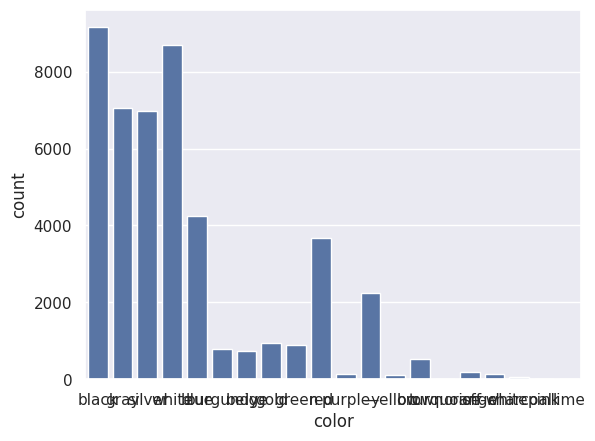

In [5]:
# @title Default title text
# Basic, minimal plot example
sns.countplot(x='color', data=df)

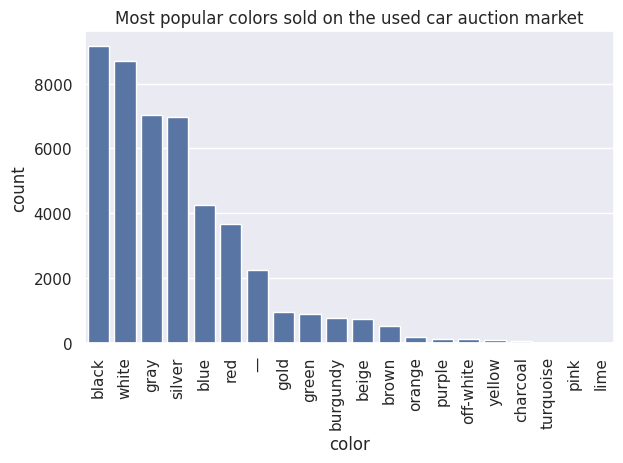

In [6]:
# Much better plot, with sorting in descending order, rotated x-axis labels for clarity, and a plot title
# Your visualizations should be neatly presented like the example below.
large_to_small = df.groupby('color').size().sort_values(ascending=False)
sns.countplot(x='color', data=df, order=large_to_small.index).set(title='Most popular colors sold on the used car auction market')
plt.xticks(rotation=90)
plt.tight_layout()

**Example note:** _you need to answer using a visualization (above) and a written/text answer (below)._

**Answer for Q0**: Black is the most popular exterior color of used cars sold in auctions, followed very closely by white.

** **bold text**Q1: What are the most popular car brands? (mention at least 3)**


**Visualization**

   year     make         model   trim   body transmission                vin  \
0  2013  Hyundai        Sonata    GLS  Sedan    automatic  5npeb4acxdh702805   
1  2014   Toyota       4Runner    SR5    SUV    automatic  jtezu5jr2e5064567   
2  2012    Lexus        IS 250   Base  Sedan    automatic  jthbf5c24c5168599   
3  2002      BMW            X5   4.4i    SUV    automatic  5uxfb33562lh33864   
4  2014     Ford  E-Series Van  E-250    NaN    automatic  1ftne2ew0eda31832   

  state  condition  odometer   color interior  \
0    ma        3.9   50404.0   black     gray   
1    fl        4.9   17846.0    gray        —   
2    fl        4.1   21122.0  silver    black   
3    fl        1.9  145303.0   black    black   
4    wa        4.9    6714.0   white     gray   

                             seller  sellingprice  \
0             the hertz corporation       10900.0   
1  award auto sales and leasing inc       29900.0   
2          lexus financial services       24200.0   
3           

<ipython-input-6-5453995a17f8>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='make', data=df, order=brand_counts.index[:3], palette='viridis')


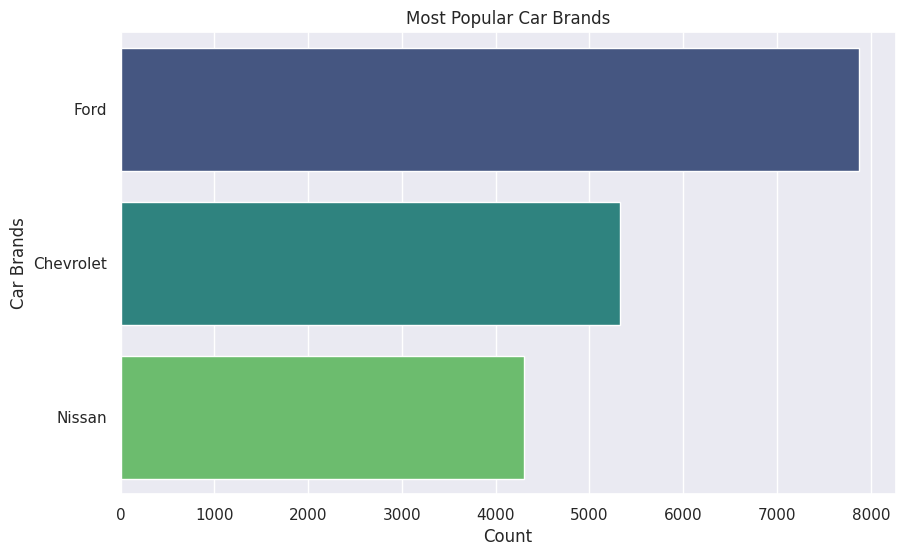

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Display the first few rows to confirm data loading
print(df.head())

# Q1: Count occurrences of each brand
brand_counts = df['make'].value_counts()

# Get the top 3 most popular brands
top_brands = brand_counts.head(3)
print("Most popular car brands:\n", top_brands)

# Visualization of the most popular car brands
plt.figure(figsize=(10, 6))
sns.countplot(y='make', data=df, order=brand_counts.index[:3], palette='viridis')
plt.title('Most Popular Car Brands')
plt.xlabel('Count')
plt.ylabel('Car Brands')
plt.show()


The most popular car brands is Ford,Chevorlet and Nissan

**Q2: Do automatic cars, on average, sell for a higher price than manual cars?**


**Visualization**

   year     make         model   trim   body transmission                vin  \
0  2013  Hyundai        Sonata    GLS  Sedan    automatic  5npeb4acxdh702805   
1  2014   Toyota       4Runner    SR5    SUV    automatic  jtezu5jr2e5064567   
2  2012    Lexus        IS 250   Base  Sedan    automatic  jthbf5c24c5168599   
3  2002      BMW            X5   4.4i    SUV    automatic  5uxfb33562lh33864   
4  2014     Ford  E-Series Van  E-250    NaN    automatic  1ftne2ew0eda31832   

  state  condition  odometer   color interior  \
0    ma        3.9   50404.0   black     gray   
1    fl        4.9   17846.0    gray        —   
2    fl        4.1   21122.0  silver    black   
3    fl        1.9  145303.0   black    black   
4    wa        4.9    6714.0   white     gray   

                             seller  sellingprice  \
0             the hertz corporation       10900.0   
1  award auto sales and leasing inc       29900.0   
2          lexus financial services       24200.0   
3           

<ipython-input-7-6b7dcd7310ff>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_prices.index, y=average_prices.values, palette='Set2')


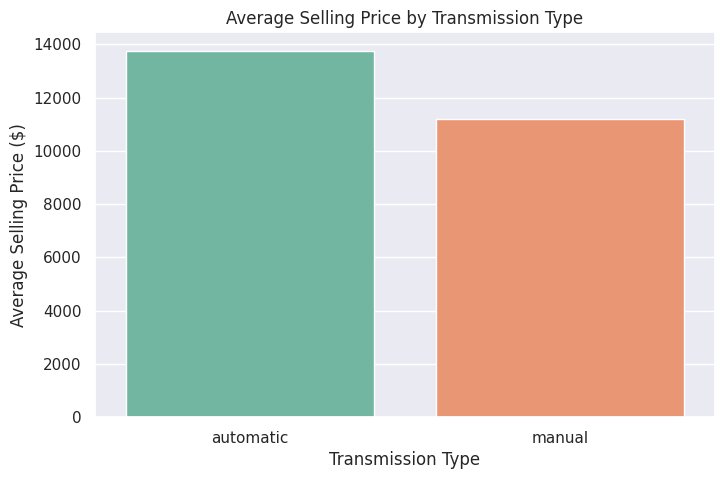

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Display the first few rows to confirm data loading
print(df.head())

# Clean the selling price column by removing the dollar sign and converting to float
df['sellingprice'] = df['sellingprice'].replace({'\$': '', ',': ''}, regex=True).astype(float)

# Group by transmission type and calculate the average selling price
average_prices = df.groupby('transmission')['sellingprice'].mean()

# Print the average prices for automatic and manual cars
print("Average Selling Prices by Transmission Type:\n", average_prices)

# Visualization
plt.figure(figsize=(8, 5))
sns.barplot(x=average_prices.index, y=average_prices.values, palette='Set2')
plt.title('Average Selling Price by Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('Average Selling Price ($)')
plt.show()


Yes, Automatic cars sell higher than Manual cars

**Q3: Draw a box plot showing the distribution of the selling prices of each car make. Which car makes have the widest distribution of selling price (name two)? Which are the most expensive (name two)?**


**Visualization**

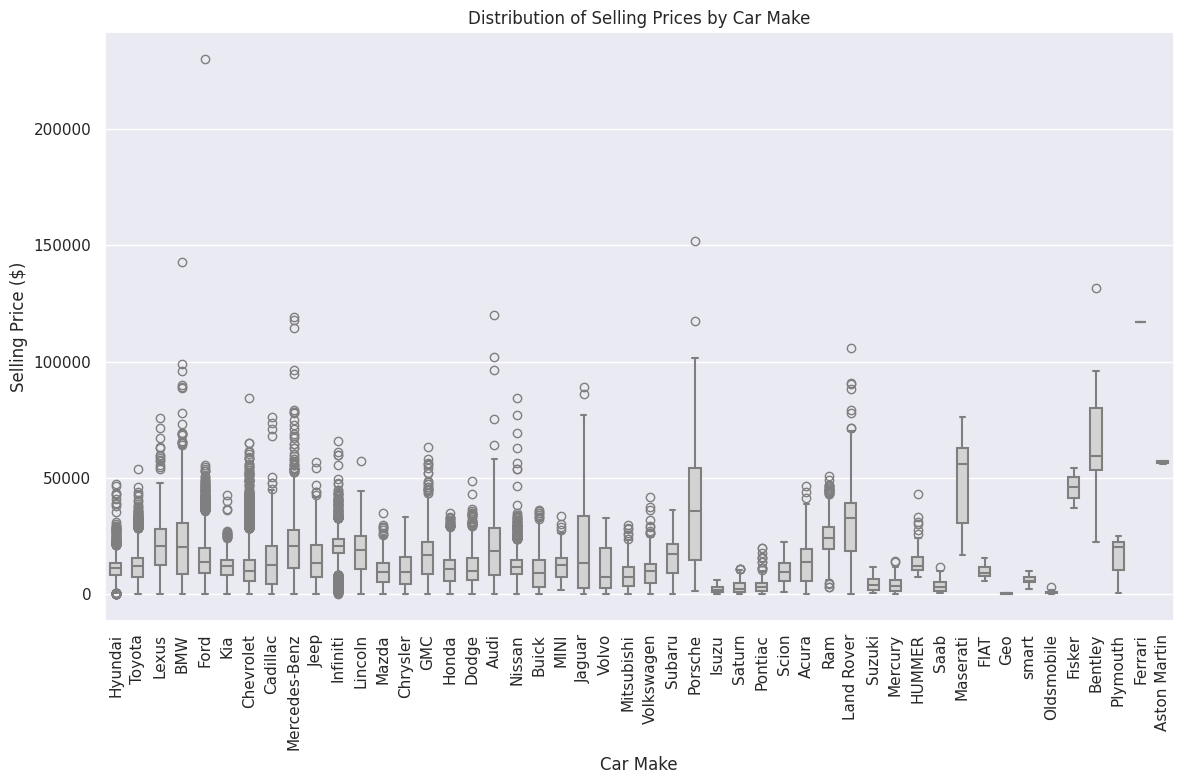

Car makes with the widest distribution of selling prices:
          count          mean           std      min      25%      50%  \
make                                                                     
Porsche   129.0  37257.751938  26717.778089   1250.0  14700.0  36000.0   
Maserati   10.0  48450.000000  20319.940945  17000.0  30812.5  56000.0   

              75%       max      IQR  
make                                  
Porsche   54500.0  152000.0  39800.0  
Maserati  62687.5   76000.0  31875.0  

Car makes with the highest average selling prices:
         count       mean           std       min       25%       50%  \
make                                                                    
Ferrari    1.0  117000.00           NaN  117000.0  117000.0  117000.0   
Bentley    8.0   67781.25  33522.827377   22700.0   53387.5   59250.0   

              75%       max      IQR  
make                                  
Ferrari  117000.0  117000.0      0.0  
Bentley   79875.0  131500.0

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Clean the 'sellingprice' column to ensure it is numeric
df['sellingprice'] = df['sellingprice'].replace({'\$': '', ',': ''}, regex=True).astype(float)

# Create a box plot
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='make', y='sellingprice', width=0.5, linewidth=1.5, whis=1.5, color='lightgray')

# Set labels and title
plt.xlabel('Car Make')
plt.ylabel('Selling Price ($)')
plt.title('Distribution of Selling Prices by Car Make')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot with adjusted layout for better spacing
plt.tight_layout()
plt.show()

# Calculate statistics for distribution analysis
price_stats = df.groupby('make')['sellingprice'].describe()

# Determine the car makes with the widest distribution (highest IQR)
price_stats['IQR'] = price_stats['75%'] - price_stats['25%']  # Interquartile range
widest_distribution_makes = price_stats.nlargest(2, 'IQR')

# Determine the car makes with the highest average selling price
highest_avg_price_makes = price_stats.nlargest(2, 'mean')

# Display the results
print("Car makes with the widest distribution of selling prices:")
print(widest_distribution_makes)

print("\nCar makes with the highest average selling prices:")
print(highest_avg_price_makes)


Porsche and Maserati are the widest distribution of selling price


Ferrari and Bentley are highest average selling price

\\**Q4: How correlated is the odometer reading or mileage with the car's sale price? (Hint: plot a line of best fit.)**

**Visualization**

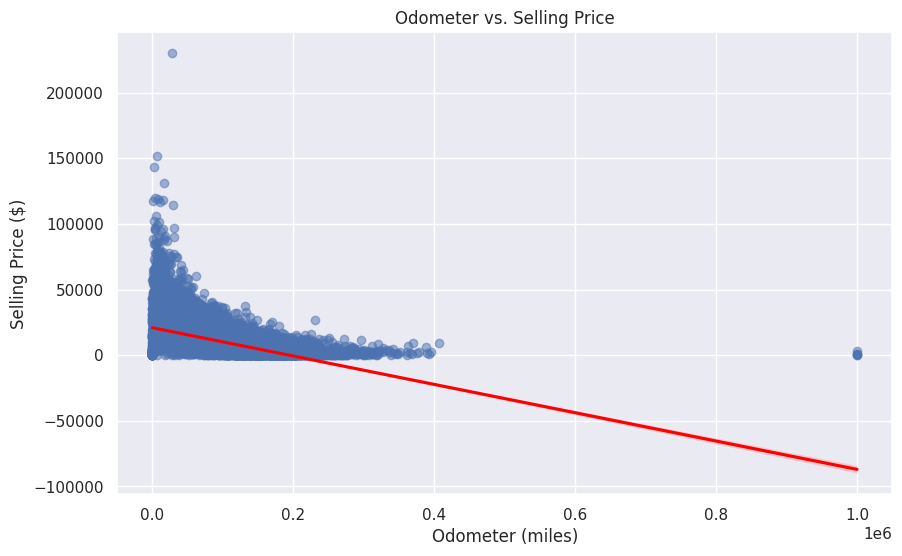

Correlation between odometer and selling price: -0.58


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'sellingprice' to string, clean it, and then convert back to float
df['sellingprice'] = df['sellingprice'].astype(str).str.replace('[\$,]', '', regex=True).astype(float)

# Convert 'odometer' to string, clean it, and then convert back to float
df['odometer'] = df['odometer'].astype(str).str.replace('[\smi,]', '', regex=True).astype(float)

# Create a scatter plot with a regression line to show the relationship between 'odometer' and 'sellingprice'
plt.figure(figsize=(10, 6))
sns.regplot(x='odometer', y='sellingprice', data=df, scatter_kws={'alpha': 0.5}, line_kws={"color": "red"})
plt.title('Odometer vs. Selling Price')
plt.xlabel('Odometer (miles)')
plt.ylabel('Selling Price ($)')
plt.show()

# Calculate and print the correlation between 'odometer' and 'sellingprice'
correlation = df['odometer'].corr(df['sellingprice'])
print(f"Correlation between odometer and selling price: {correlation:.2f}")


Correlation between odometer reading and selling price: -0.58


**Q5: Likewise, how correlated is the car's condition with its sale price? (Hint: plot a line of best fit.)**

**Visualization**

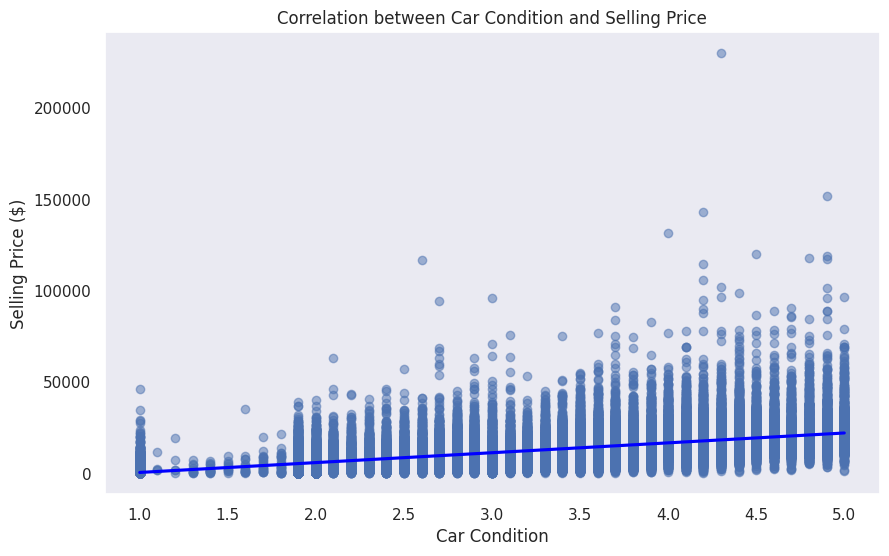

Correlation between car condition and selling price: 0.53


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Clean the selling price column by removing the dollar sign and converting to float
df['sellingprice'] = df['sellingprice'].replace({'\$': '', ',': ''}, regex=True).astype(float)

# Check if 'condition' is in the right format; if necessary, convert it to a numeric type
# Assuming 'condition' is already numeric; if it's categorical, you may need to map it
df['condition'] = pd.to_numeric(df['condition'], errors='coerce')

# Create a scatter plot with a line of best fit
plt.figure(figsize=(10, 6))
sns.regplot(x='condition', y='sellingprice', data=df, scatter_kws={'alpha': 0.5}, line_kws={"color": "blue"})
plt.title('Correlation between Car Condition and Selling Price')
plt.xlabel('Car Condition')
plt.ylabel('Selling Price ($)')
plt.grid()
plt.show()

# Calculate and display the correlation coefficient
correlation = df['condition'].corr(df['sellingprice'])
print(f"Correlation between car condition and selling price: {correlation:.2f}")


Correlation between car condition and selling price: 0.53

**Q6: Are there differences in the average car price due to the car's body type? If so, rank their order and state the most expensive and least expensive car body type.**

**Visualization**

Average Selling Price by Body Type:
body
Convertible    17132.510337
SUV            16221.941270
Coupe          15876.286984
Minivan        14109.039157
Sedan          11580.043630
Hatchback      10320.636123
Wagon           9851.124128
Name: sellingprice, dtype: float64

Most Expensive Body Type: Convertible ($17132.51)
Least Expensive Body Type: Wagon ($9851.12)


<ipython-input-12-074869711f00>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_price_by_body.index, y=average_price_by_body.values, palette='viridis')


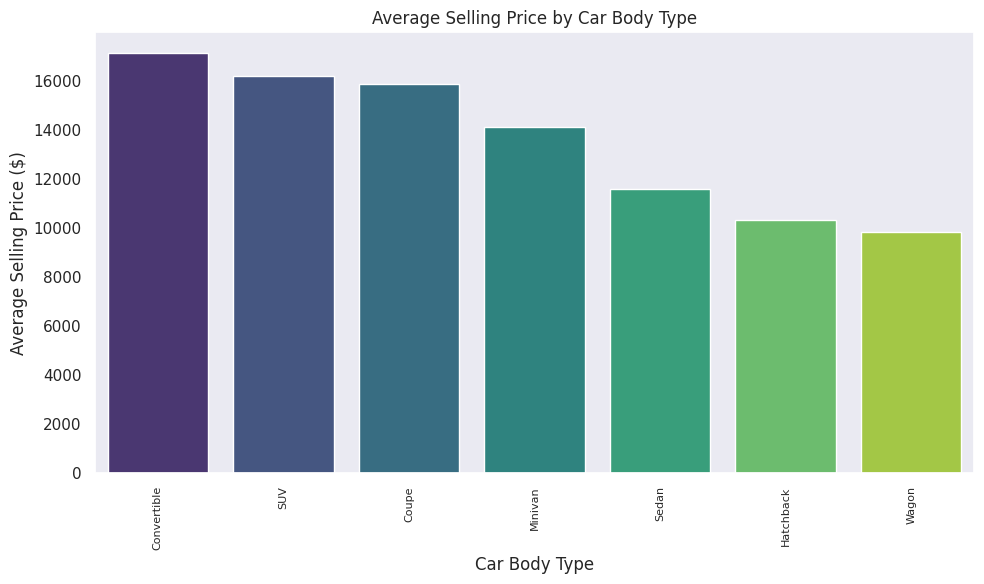

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Clean the selling price column by removing the dollar sign and converting to float
df['sellingprice'] = df['sellingprice'].replace({'\$': '', ',': ''}, regex=True).astype(float)

# Calculate the average selling price by body type
average_price_by_body = df.groupby('body')['sellingprice'].mean().sort_values(ascending=False)

# Display the average prices
print("Average Selling Price by Body Type:")
print(average_price_by_body)

# Find the most and least expensive body types
most_expensive_body_type = average_price_by_body.idxmax()
least_expensive_body_type = average_price_by_body.idxmin()
most_expensive_price = average_price_by_body.max()
least_expensive_price = average_price_by_body.min()

# Print the results
print(f"\nMost Expensive Body Type: {most_expensive_body_type} (${most_expensive_price:.2f})")
print(f"Least Expensive Body Type: {least_expensive_body_type} (${least_expensive_price:.2f})")

# Create a bar plot to visualize the average selling prices by body type
plt.figure(figsize=(10, 6))
sns.barplot(x=average_price_by_body.index, y=average_price_by_body.values, palette='viridis')
plt.title('Average Selling Price by Car Body Type')
plt.xlabel('Car Body Type')
plt.ylabel('Average Selling Price ($)')

# Rotate x-axis labels vertically and decrease font size
plt.xticks(rotation=90, fontsize=8)  # Reduced fontsize for x-axis labels
plt.grid(axis='y')
plt.tight_layout()  # Automatically adjust subplot parameters to give specified padding
plt.show()

the most expensive car body type is 'Convertible' and the least expensive one is 'Wagon'

## Data Preparation for Modelling

_Apply any additional data preparation steps needed before modelling below. Show/output the changes to the dataset._

In [13]:
selected_atrributes = ['make', 'model', 'trim', 'body', 'transmission', 'odometer', 'state', 'condition', 'color', 'interior', 'seller', 'sellingprice']
df = df[selected_atrributes]
# Data Pre-Processing: One-Hot Encoding for Categorical Variables
categorical_columns = ['make', 'model', 'trim', 'body', 'transmission',  'state', 'color', 'interior', 'seller']

df = pd.get_dummies(data=df, columns=categorical_columns, drop_first=True)
# Display the cleaned dataset
# Data Pre-Processing: Remove 'mi' suffix and convert to float for 'odometer'
                       #Normalization
df['sellingprice'] = df['sellingprice'].apply(lambda x: x.replace('$', '')if isinstance(x, str) else x)
df['sellingprice'] = df['sellingprice'].astype(int)
df['odometer'] = df['odometer'].apply(lambda x: x.replace('mi', '')if isinstance(x, str) else x)
df['odometer'] = df['odometer'].astype(float)
# Replace null values in 'odometer' with the mode
odometer_mode = df['odometer'].mode()[0]
df.head()


,odometer,condition,sellingprice,make_Aston Martin,make_Audi,make_BMW,make_Bentley,make_Buick,make_Cadillac,make_Chevrolet,...,seller_zanger enterprises inc,seller_zappone chrysler jeep dodge inc,seller_zappone chrysler jeep dodge ram,seller_zeibak auto trading,seller_zeigler honda amherst,seller_zimbrick eastside,seller_zimbrick volkswagen of madison,seller_zimmerman auto brokers inc,seller_zinc auto finance,seller_zmax moto leasing inc
0,50404.0,3.9,10900,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,17846.0,4.9,29900,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,21122.0,4.1,24200,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,145303.0,1.9,3200,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,6714.0,4.9,22100,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## Modelling

_Apply the linear regression model below._

In [14]:
#Train-Test split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

x = df.drop('sellingprice',axis=1) #we removed dependent variable
y = df['sellingprice'] #we encoded dependent variable

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=23)

print('Training dataset size:', x_train.shape[0])
print('Testing dataset size:', x_test.shape[0])


Training dataset size: 37262
Testing dataset size: 9316


In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(x_train, y_train);

In [ ]:
parameter = ['theta_0'] + ['theta_{}'.format(i+1) for i in range(x.shape[1])]
columns = ['y-intersect'] + list(x.columns.values)
sk_theta = pd.Series([lin_reg.intercept_] + list(lin_reg.coef_))

parameter_df = pd.DataFrame({'parameter':parameter,'column':columns, 'theta_value': sk_theta})
parameter_df

## Model Evaluation & Validation

_Evaluate the model you applied and check if it meets the necessary assumptions for the chosen model._

In [4]:
# sklearn regression module
y_pred = lin_reg.predict(x_test)

# Evaluation
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y_pred, y_test, squared=False)

# R_square

print('The root mean square error (RMSE) is: ', rmse)
print('R^2 obtained is:', R_square)

NameError: name 'lin_reg' is not defined

## Conclusion and Recommendations

Comment on the model accuracy and your findings from model evaluation and validation. State the problems (if any) and suggest possible solutions. Would you recommend this model for a used cars dealership that wants to get reliable estimates for used car prices?

**Answer**: your answer here.